# Spotify Project

## Introduction

The project applies PyTorch, a leading deep learning framework, to the task of predicting Spotify’s popularity score (0–100) for songs based on their audio features. Our goal is to collaboratively build a neural network capable of estimating a song’s popularity using attributes such as danceability, energy, valence, tempo, and more.

By shifting from traditional machine learning approaches to a neural network–based solution, we aim to gain practical experience with an industry-standard tool while addressing a real-world regression problem. The project will involve designing, training, and evaluating multiple network architectures, with a focus on improving performance through iterative experimentation.

In [890]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Data Preprocessing

In [891]:
# Load the dataset
data = pd.read_csv('dataset/SpotifyFeatures.csv')

In [892]:
# Display the first few rows of the dataset
data.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


In [893]:
# Display the shape of 'data' DataFrame 
n_rows, n_cols = data.shape
print(f"The DataFrame has {n_rows} rows and {n_cols} columns") 

The DataFrame has 232725 rows and 18 columns


In [894]:
# Display informative summary of the 'data' DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232725 entries, 0 to 232724
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   genre             232725 non-null  object 
 1   artist_name       232725 non-null  object 
 2   track_name        232724 non-null  object 
 3   track_id          232725 non-null  object 
 4   popularity        232725 non-null  int64  
 5   acousticness      232725 non-null  float64
 6   danceability      232725 non-null  float64
 7   duration_ms       232725 non-null  int64  
 8   energy            232725 non-null  float64
 9   instrumentalness  232725 non-null  float64
 10  key               232725 non-null  object 
 11  liveness          232725 non-null  float64
 12  loudness          232725 non-null  float64
 13  mode              232725 non-null  object 
 14  speechiness       232725 non-null  float64
 15  tempo             232725 non-null  float64
 16  time_signature    23

In [895]:
# Check for any duplicates in the dataframe
duplicates = data[data.duplicated()]
print(f"Number of duplicates: {duplicates.shape[0]}")

Number of duplicates: 0


In [896]:
# Check for missing values in 'data' DataFrame
display(data.isna().sum())

genre               0
artist_name         0
track_name          1
track_id            0
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
dtype: int64

In [897]:
# Drop missing values
data = data.dropna()

# Check for missing values again
data.isna().sum()

genre               0
artist_name         0
track_name          0
track_id            0
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
dtype: int64

In [898]:
# Let's remove some obvious irrelevant features
# track_id — just unique identifier
# track_name — title text
# artist_name - high cardinality and chance of data leakage

data = data.drop(columns=['track_id', 'track_name', 'artist_name'])

In [900]:
# Quick look
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 232724 entries, 0 to 232724
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   popularity        232724 non-null  int64  
 1   acousticness      232724 non-null  float64
 2   danceability      232724 non-null  float64
 3   duration_ms       232724 non-null  int64  
 4   energy            232724 non-null  float64
 5   instrumentalness  232724 non-null  float64
 6   liveness          232724 non-null  float64
 7   loudness          232724 non-null  float64
 8   mode              232724 non-null  object 
 9   speechiness       232724 non-null  float64
 10  tempo             232724 non-null  float64
 11  time_signature    232724 non-null  object 
 12  valence           232724 non-null  float64
dtypes: float64(9), int64(2), object(2)
memory usage: 24.9+ MB


## EDA

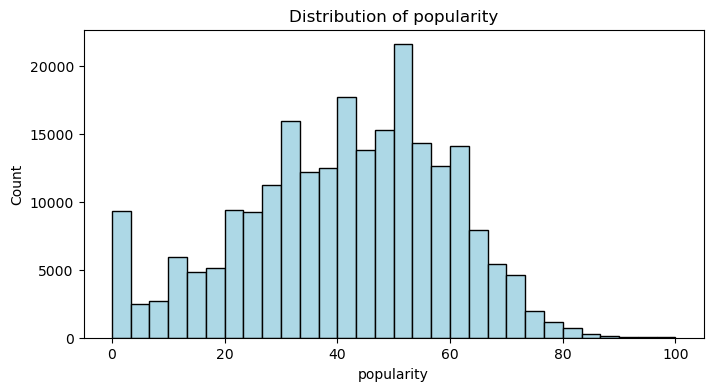

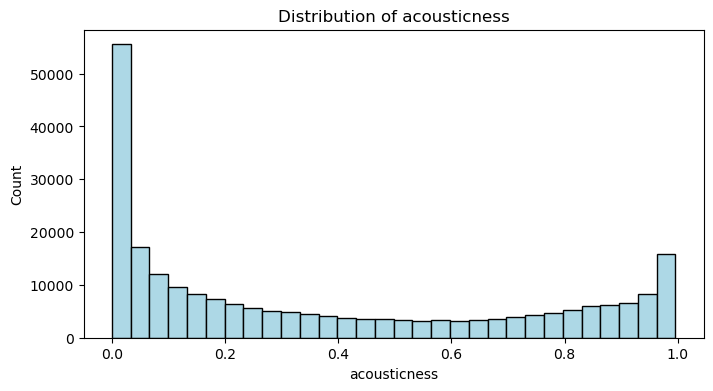

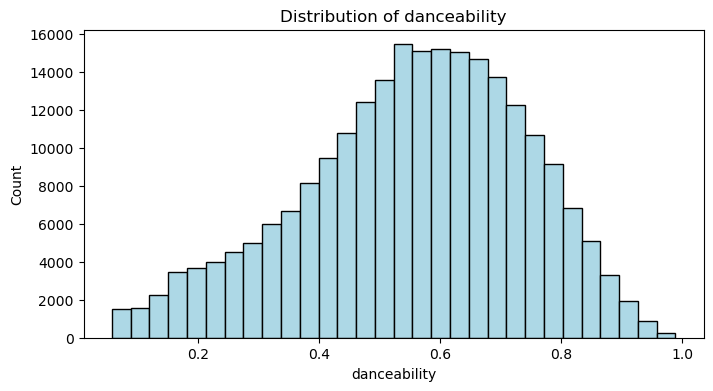

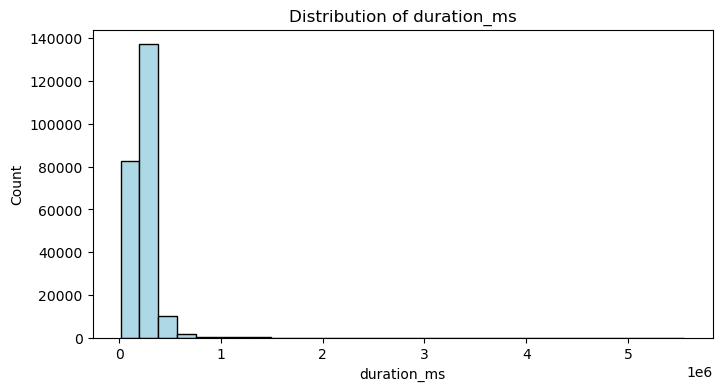

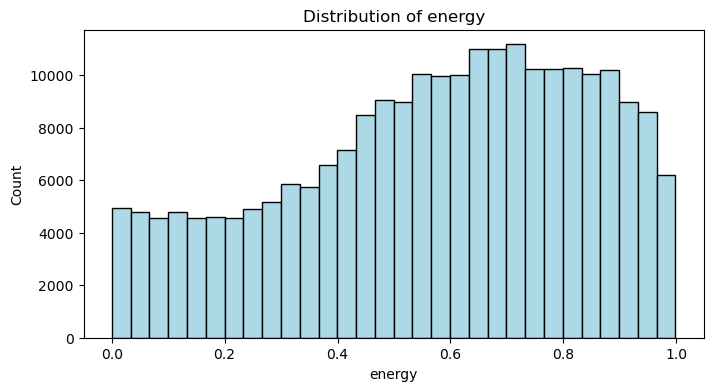

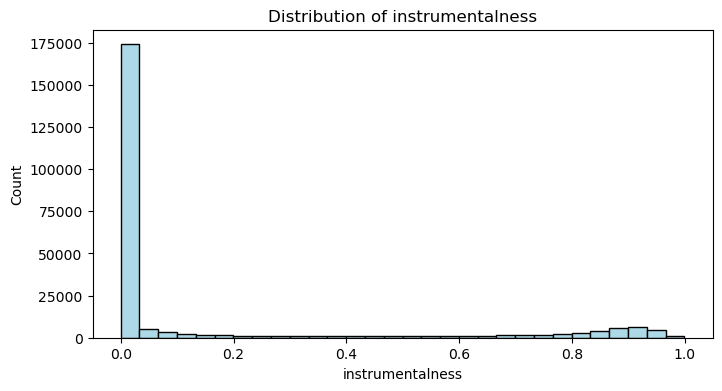

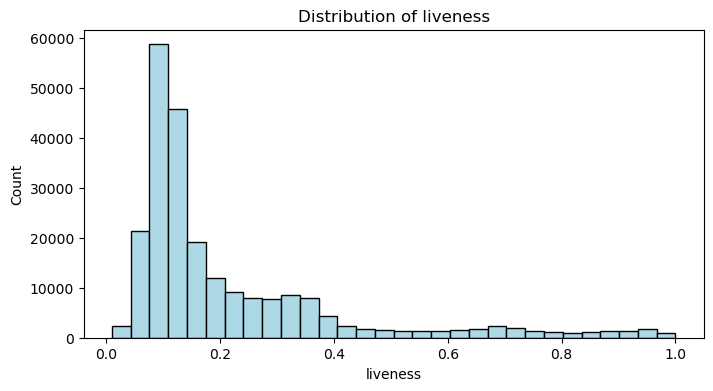

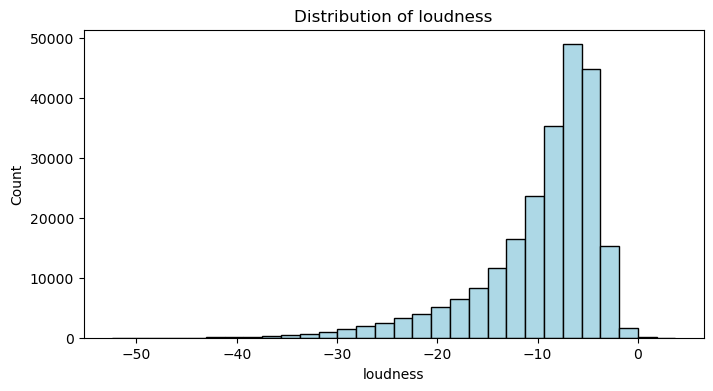

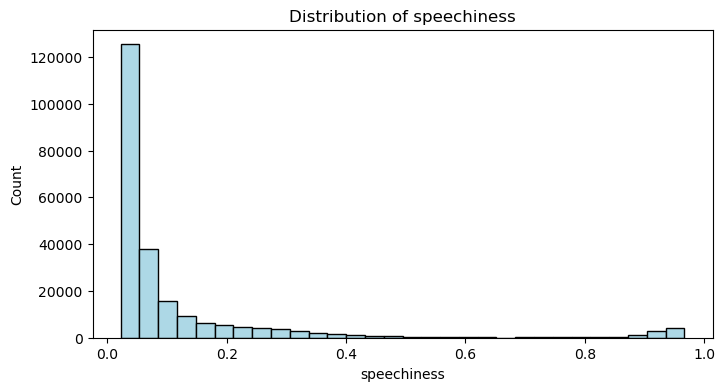

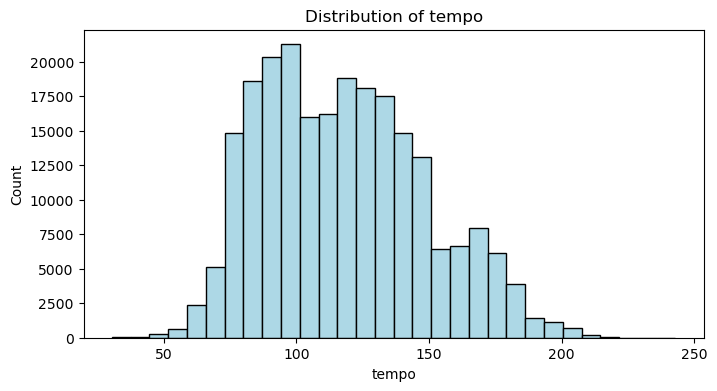

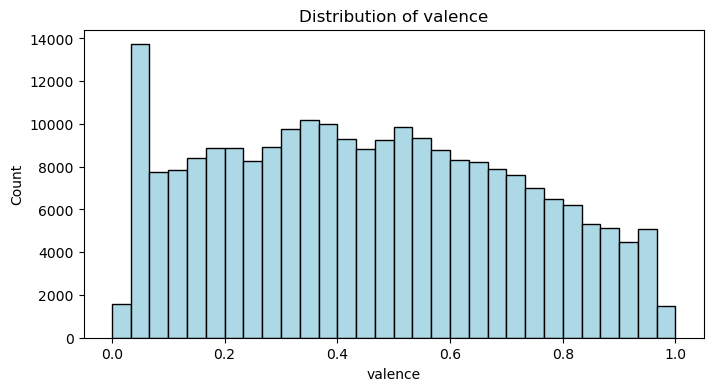

In [901]:
# Lets explore the distribution of numerical features

# Select numeric columns
numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns

for one_col in numeric_cols:
    plt.figure(figsize=(8, 4))
    plt.hist(data[one_col], bins=30, color='lightblue', edgecolor='black')
    plt.title(f'Distribution of {one_col}')
    plt.xlabel(one_col)
    plt.ylabel('Count')
    plt.show()

The feature `duration_ms` distribution is too extreme. So it is better to log tranform that.

In [902]:
# log transform 
data['duration_ms_log'] = np.log1p(data['duration_ms'])

# drop original column
data = data.drop(columns=['duration_ms'])


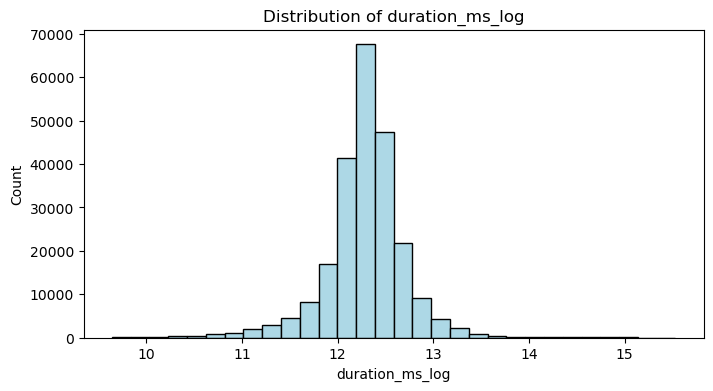

In [903]:
# Distribution after log transformation
plt.figure(figsize=(8, 4))
plt.hist(data['duration_ms_log'], bins=30, color='lightblue', edgecolor='black')
plt.title('Distribution of duration_ms_log')
plt.xlabel('duration_ms_log')
plt.ylabel('Count')
plt.show()

In [904]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 232724 entries, 0 to 232724
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   popularity        232724 non-null  int64  
 1   acousticness      232724 non-null  float64
 2   danceability      232724 non-null  float64
 3   energy            232724 non-null  float64
 4   instrumentalness  232724 non-null  float64
 5   liveness          232724 non-null  float64
 6   loudness          232724 non-null  float64
 7   mode              232724 non-null  object 
 8   speechiness       232724 non-null  float64
 9   tempo             232724 non-null  float64
 10  time_signature    232724 non-null  object 
 11  valence           232724 non-null  float64
 12  duration_ms_log   232724 non-null  float64
dtypes: float64(10), int64(1), object(2)
memory usage: 24.9+ MB


In [905]:
# Lets explore some categorical columns
# `time_signature` feature

data['time_signature'].value_counts()

time_signature
4/4    200759
3/4     24111
5/4      5238
1/4      2608
0/4         8
Name: count, dtype: int64

We can do feature engineering here: create binary column: 1 if time_signature is "4/4", otherwise 0.

In [906]:
# Create a binary column

data['time_signature'] = np.where(data['time_signature'] == '4/4', 1, 0)

# Quick check
data['time_signature'].value_counts()

time_signature
1    200759
0     31965
Name: count, dtype: int64

In [907]:
# Let's explore `mode`
data['mode'].value_counts()

mode
Major    151743
Minor     80981
Name: count, dtype: int64

We can engineer a feature to create a binary column.

In [908]:
# Create a binary column
data['mode'] = data['mode'].map({'Major': 1, 'Minor': 0})

In [909]:
# # Explore `key`
# data['key'].value_counts()

Should we change do OHE or just remove this column? Need to discuss....

In [910]:
# # Explore `genre`
# data['genre'].value_counts()

This is a bit tricky. This feature seems important to me. But at the same time, if we do OHE, we will be increasing so many features. Not sure what to do. Discard or keep it? Need to discuss on that......

In [911]:
# High-energy danceable songs tend to be more popular in reels and tiktok. Let's do feature engineering
data['energy_danceability'] = data['energy'] * data['danceability']

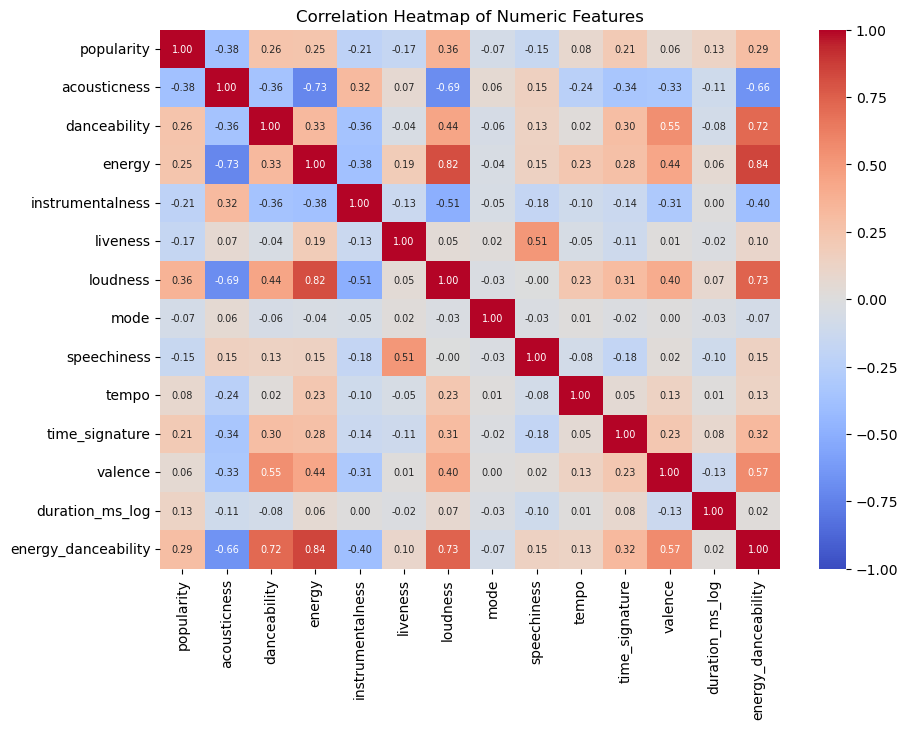

In [912]:
# Create a heat map to see if there is multicollinearity.

# Select numeric columns
numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns

# Correlation matrix
corr_matrix = data[numeric_cols].corr()

# Plot heatmap 
plt.figure(figsize=(10, 7))
sns.heatmap(
    corr_matrix, 
    annot=True,          
    fmt='.2f',           
    cmap='coolwarm',
    annot_kws={'size': 7},     
    vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Numeric Features')
plt.show()

No multicollinearity.

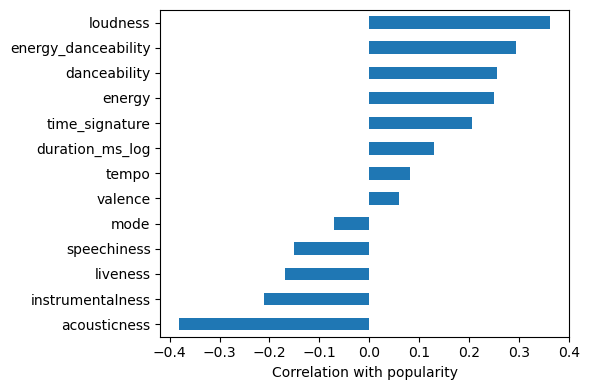

In [913]:
# Let's explore how target is correlated to numeric features

num_features = data.select_dtypes(include='number').columns.drop('popularity')
corr = data[num_features].corrwith(data['popularity']).sort_values()

plt.figure(figsize=(6, 4))
corr.plot.barh()
plt.xlabel('Correlation with popularity')
plt.tight_layout()
plt.show()
